## **What is CNN**

Convolutional Neural Networks (CNNs) are a type of deep learning model specifically designed to process and analyse structured data, such as images or
videos. They are particularly effective in tasks like image classification, image recognition and object detection due to their ability to automatically and
efficiently learn spatial hierarchies of features.

Cnn works well with grid like Data.

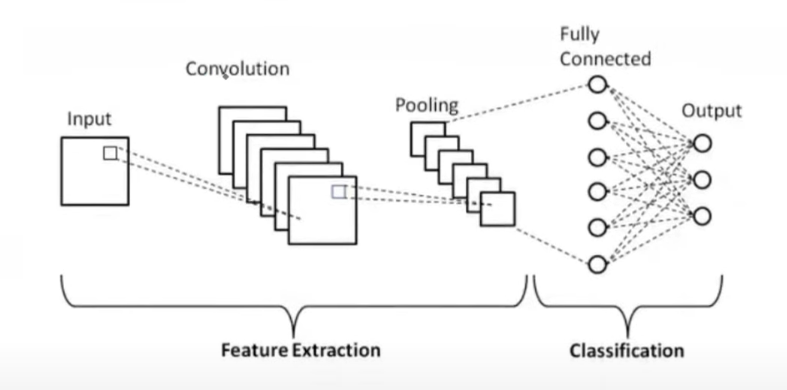

**Quick Overview of How CNN Works and Perform well on grid like data.**

The complete Architecture is divided into 2 components.
- Feature Extaction
- Classification.

#### **Feature Extraction**

In this we try to extract all the key features of the data. For example for a cat image extract all features such as *Pointy ears, Tail, Moustache, Size.*

The feature Extraction consist of two layers.
1. Convolution Layer.
2. Pooling Layer.

- **Convolution Layer:** In this we have small small filters (e.g: 3x3 filter). The main task of this filter is to apply this filter on images. And they extract low level features from our data. We can have `n` number of filters (e.g 32 filters, 64 filters) Each filter will work on extracting different features.

- **Pooling Layer:** It does multiple things, But the main task is to reduce the size of the tensor by applying techniques like, Max pooling, Average Pooling etc.

#### **Classification**

Now all the extracted features of convolution and pooling are taken as input in a single fully connected layer.(1D tensor for Input).

Here we use a ANN which we are using till now.

**The Architecture which we are going to Build**

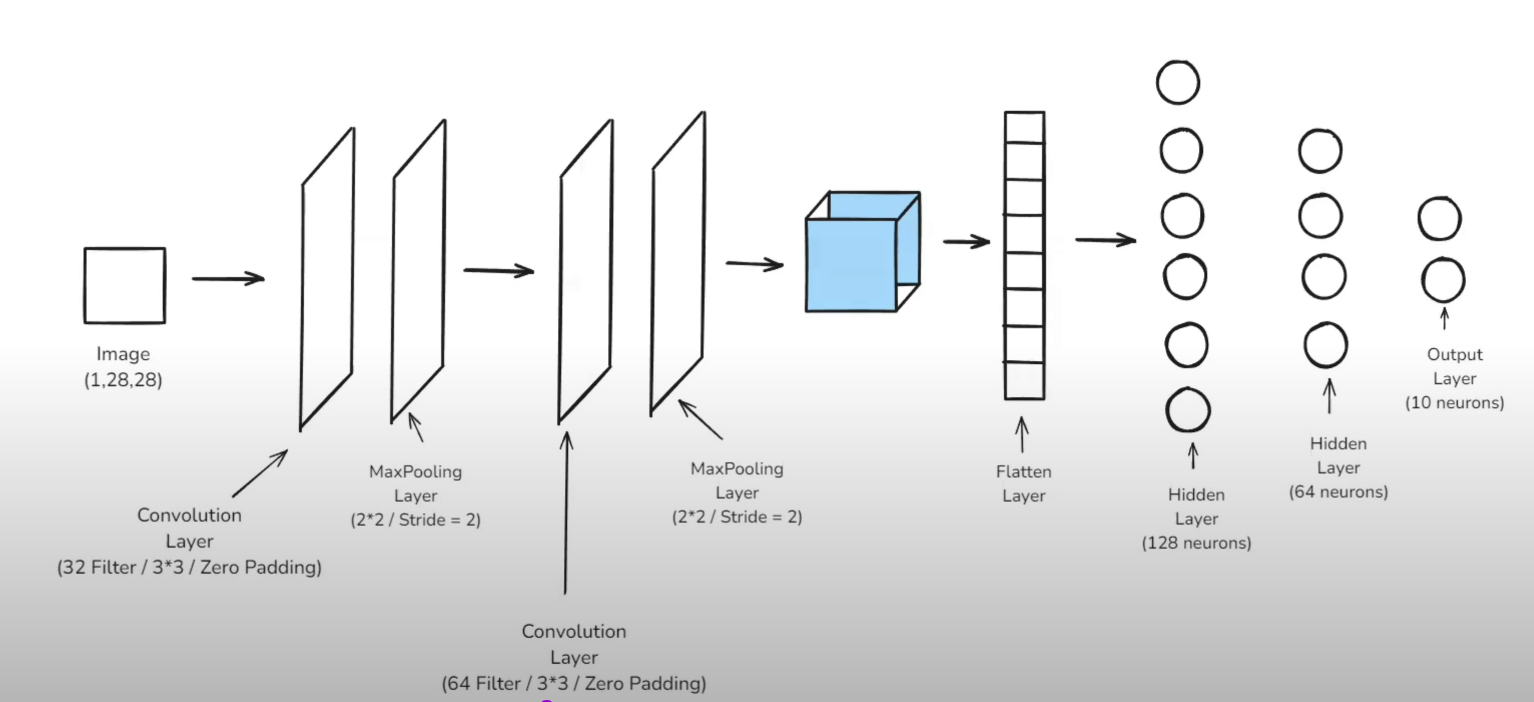

**This is the Most Common Architecture But there are some slight different architecture for other task such as object detection, edge detection etc.**

- 2 pairs of convolution & Pooling Layer.
- First pair will consist of 32 filters of size 3x3. With Padding(To not reduce the size) in Colvolution. 2x2 size, with Stride=2 in Pooling Layer, respectively.
- Next pair will have same configuration just a slight change in convolution layer with 64 filters.
- Final Features will be Flattened to 1d tensors.
- Then a 2 hidden layer with 128, 64 neurons.

In [ ]:
# Import Libraries
import os #for kaggle
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Set a manual seed so that anyone running this notebook will have same result
torch.manual_seed(42)

In [ ]:
"""
Always check the availability of the GPU
"""
device = torch.device("cuda" if torch.cuda.is_available() else "cpu" )

print(f"Using the {device}")


Using the cuda


In [ ]:
import kagglehub

# Download latest version
fashion_mnist_path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", fashion_mnist_path)

dataset_full_path = os.path.join(fashion_mnist_path, "fashion-mnist_train.csv")

Path to dataset files: /kaggle/input/fashionmnist


In [ ]:
# Read data

df = pd.read_csv(dataset_full_path)

df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(60000, 785)

So we have 784 features.

One Label

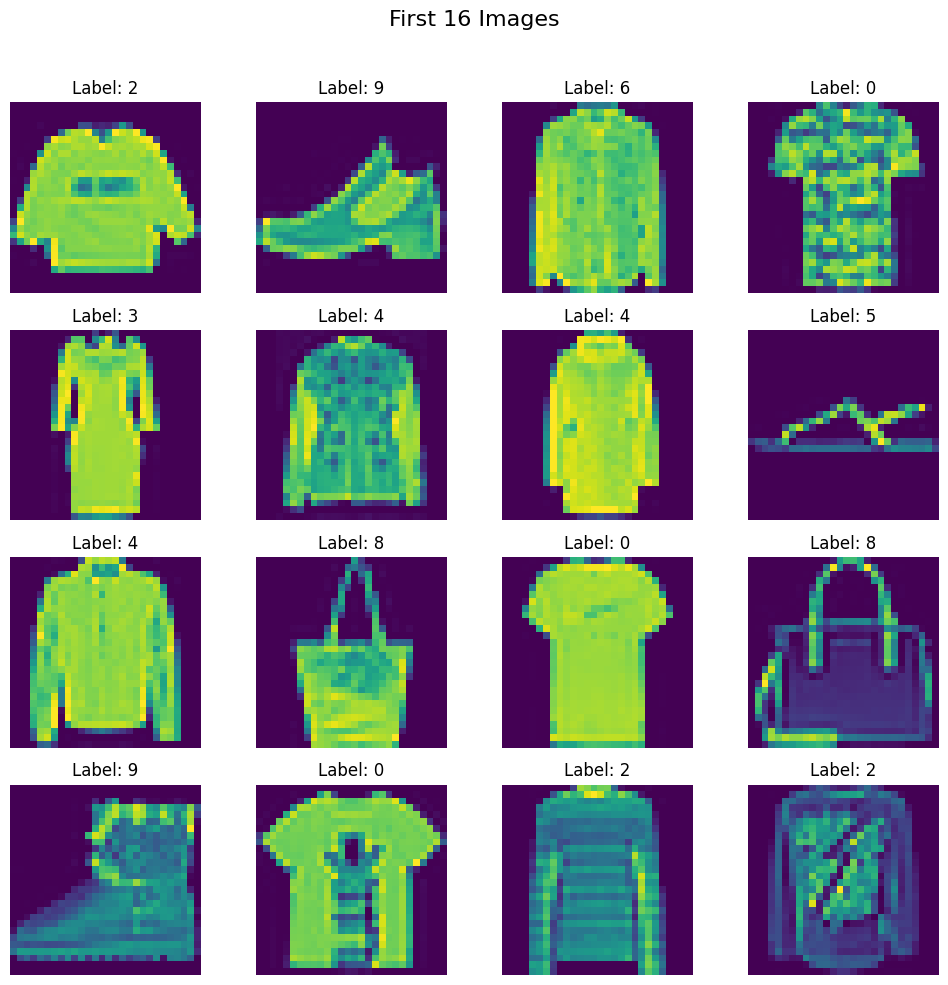

In [ ]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [ ]:
df['label'].nunique()

10

In [ ]:
df['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

So this is a Multiclass Classification Problem we have 10 different Classess.

In [ ]:
# x = df.iloc[:,1:]
x = df.iloc[:,1:].values

In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x.shape

(60000, 784)

In [ ]:
# Only label col
y = df.iloc[:,0].values

In [ ]:
y

array([2, 9, 6, ..., 8, 8, 7])

In [ ]:
y.shape

(60000,)

In [ ]:
# Perform the splitting on Data
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
x_test

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 211, 102,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [ ]:
y_train

array([5, 7, 8, ..., 9, 4, 0])

In [ ]:
y_test

array([7, 8, 8, ..., 9, 5, 5])

Now we can see that Most of the values in our data is 0 but some places have higher values because they are representating pixel values so we need to Normalize/Scale this between 0 to 1. We can simply do this by dividing the data with 255 Because we have 256 pixels in an image

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.        ]])

## Dataset Class

The main change will be here.
Because currently we are recieving 784 inputs as a single features i.e one Row at a time.

But now we needed an image so we have to reshape those 784 pixels into `28x28 = 784` size image.

Along with that we have to specify the number of channels that means is it greyscale or rgb. Since Our is grescale we have 1.

Along with that we need to specify the batch size, but since we don't know batch_size right now we will replace it with a placeholder as `-1`. This will get adjusted when making data loader.

Replace this.
```python
self.features = torch.tensor(features, dtype=torch.float32)
```

With This
```python
self.features = torch.tensor(features, dtype=torch.float32).reshape(batch_size,channel,width,height)
```

In [ ]:
class CustomDataset(Dataset):

  def __init__(self, features, labels):
      # We need 2d image instead of row of pixel values, along with channel and batch size(temp batch size -1 => will get replaced in data loader)
    self.features = torch.tensor(features, dtype=torch.float32).reshape(-1,1,28,28)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
     return self.features[index], self.labels[index]

In [ ]:
# train dataset object

train_dataset = CustomDataset(x_train, y_train)

In [ ]:
train_dataset

In [ ]:
len(train_dataset)

48000

In [ ]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2275,
         0.5333, 0.0000, 0.0

In [ ]:
# Test Dataset

test_dataset = CustomDataset(x_test, y_test)

In [ ]:
test_dataset

In [ ]:
len(test_dataset)

12000

**DATA LOADER for Batches**

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)

# Because while prediction we dont need shuffling
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

In [ ]:
# total batches
len(train_loader)

1500

## **NEURAL Network**

Keep This in Mind For Achitecture.

**Our CNN Architecture**

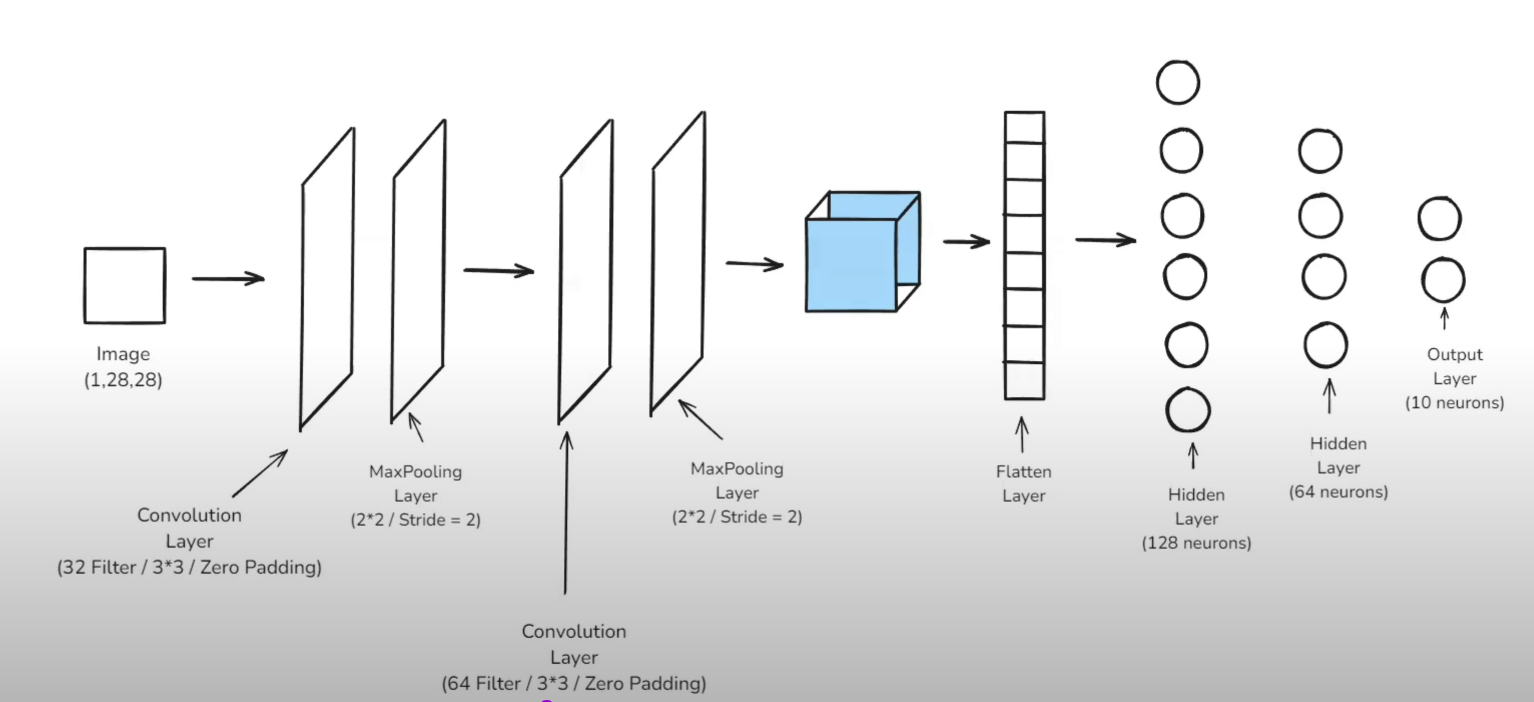

**So In order to create feature Extraction Layer we have to specify Make it in pairs.**

- `channels` : This is we are getting from input image, so now rather than taking num_features as constructor input we are going to take channels as input. we will get this from image features.
  
- `padding_scheme`: it is nothing but to define which padding we are using

**Creating 1st Pair**

```python

# Create convolution layer of 1st pair
nn.Conv2d(input_channels,number_of_filters,kernel_size, padding_scheme)
# BatchNorm....
# Create Activation....
# Create Pooling layer of 1st pair
nn.MaxPool2d(kernel_size,stride)
```

**Creating 2nd Pair**

- For 2nd Pair Our input will be what we are recieving from previous layer.

**To create Classification Layer**

- apply the flattening layer to make it 1 dimensional using Flatten.
- Apply Hidden layers:
  
> Now to pass input to this layer we have to understand the shape of flatten layer. To get that we have to understand what we have passed in feature extraction.

> In 1st pair size of image is (1,28,28) --> convolution layer (32 filters) & since padding so size does not change only channel changes due to filters --> (32,28,28) --> pooling operation(2x2) & stride 2 thus size will get half.===>> (32,14,14)

> In 2nd pair size of image is (32,14,14) --> convolution layer (64 filters) & since padding so size does not change only channel changes due to filters --> (64,14,14) --> pooling operation(2x2) & stride 2 thus size will get half.===>> (64,7,7)

> The final tensor will have a shape (64,7,7). Thus after flattening it we will get `64x7x7` as input numbers for classification layer

We can also calculate this through code this is just explaination behind the seen.

In [ ]:
class MyNetwork(nn.Module):

  # constructor
  def __init__(self, input_features):
    super().__init__()
    # Create Architecture in 2 parts

    # features extraction container
    self.features = nn.Sequential(
        # 1st pair of layer
        nn.Conv2d(input_features, 32, kernel_size=3, padding="same"),
        nn.BatchNorm2d(32), #we have 2d data
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        # 2nd pair of layer
        nn.Conv2d(32, 64, kernel_size=3, padding="same"),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )

    # Classification Container
    self.classifier = nn.Sequential(
        # Flatten the incoming tensor
        nn.Flatten(),

        # Check above description about how we get 64*7*7. Next hidden layer will have 128 neurons
        nn.Linear(64*7*7,128),
        nn.ReLU(),
        nn.Dropout(0.3),

        nn.Linear(128,64),
        nn.ReLU(),
        nn.Dropout(0.3),

        nn.Linear(64,10)
    )


  # forward
  def forward(self,x):

      # We will propogate in two stages
      # feature extraction
      out = self.features(x)
      # classification
      final_out = self.classifier(out)

      return final_out


## **Training PipeLine**

**Define Params**

In [ ]:
# Parameters

epochs = 100
learning_rate = 0.01

In [ ]:
# Model
# Here we know the channels for our images since it is greyscale we will simply pass 1
model = MyNetwork(1)

In [ ]:
"""
Move the Model to GPU
"""

model.to(device)

MyNetwork(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.3, inplace=False)
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
# Loss function
criteria = nn.CrossEntropyLoss()

In [ ]:
# Optimizer

optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-4)

**Actual training**

In [ ]:
for epoch in range(epochs):

  # just to check all batches loss
  total_epoch_loss = 0
  for batch_features, batch_labels in train_loader:

    """
    Move data to gpu
    """
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)


    # forward pass
    outputs = model.forward(batch_features)

    # calculate loss
    loss = criteria(outputs, batch_labels)

    # clear gradient
    optimizer.zero_grad()

    # backprop(calculate gradient)
    loss.backward()

    # update weigths and bias
    optimizer.step()

    # Add to epoch loss just for checking loss of each epoch
    total_epoch_loss += loss

  # Average Loss
  avg_loss = total_epoch_loss/len(train_loader)

  print(f"Epoch:{epoch +1}, Loss:{avg_loss}")
  print("-"*30)


Epoch:1, Loss:0.7109512686729431
------------------------------
Epoch:2, Loss:0.42668718099594116
------------------------------
Epoch:3, Loss:0.36120331287384033
------------------------------
Epoch:4, Loss:0.32601603865623474
------------------------------
Epoch:5, Loss:0.302511602640152
------------------------------
Epoch:6, Loss:0.27842438220977783
------------------------------
Epoch:7, Loss:0.26649385690689087
------------------------------
Epoch:8, Loss:0.25356367230415344
------------------------------
Epoch:9, Loss:0.23988907039165497
------------------------------
Epoch:10, Loss:0.22817042469978333
------------------------------
Epoch:11, Loss:0.21809391677379608
------------------------------
Epoch:12, Loss:0.20995424687862396
------------------------------
Epoch:13, Loss:0.20288726687431335
------------------------------
Epoch:14, Loss:0.19338004291057587
------------------------------
Epoch:15, Loss:0.18559442460536957
------------------------------
Epoch:16, Loss:0.17816

## **Evaluation**

In [ ]:
# Set to Evaluation Mode

model.eval()

MyNetwork(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.3, inplace=False)
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

**Evaluation on Testing Data**

In [ ]:
# Variables for evaluation
total = 0
correct = 0


with torch.no_grad():

  # Since our testing data is also in batches.

  for batch_features, batch_labels in test_loader:

      """
      Move data to gpu
      """
      batch_features = batch_features.to(device)
      batch_labels = batch_labels.to(device)


      # predict on each image
      outputs = model.forward(batch_features)

      # check if it is correct or not
      # See Below Explaination
      # Row wise we need to check for each outputs max value
      # This will return value and index
      idx, v = torch.max(outputs, 1)

      # update total (Add rows)
      total += batch_labels.shape[0]

      # Correct (where predicted is same as batch_label)

      correct = correct + (v == batch_labels).sum()

accuracy = (correct/total)

print(f"Accuracy:{accuracy}")

Accuracy:0.922333300113678


**Evaluation on Training Data**

In [ ]:
# Variables for evaluation
total = 0
correct = 0


with torch.no_grad():

  # Since our testing data is also in batches.

  for batch_features, batch_labels in train_loader:

      """
      Move data to gpu
      """
      batch_features = batch_features.to(device)
      batch_labels = batch_labels.to(device)


      # predict on each image
      outputs = model.forward(batch_features)

      # check if it is correct or not
      # See Below Explaination
      # Row wise we need to check for each outputs max value
      # This will return value and index
      idx, v = torch.max(outputs, 1)

      # update total (Add rows)
      total += batch_labels.shape[0]

      # Correct (where predicted is same as batch_label)

      correct = correct + (v == batch_labels).sum()

accuracy = (correct/total)

print(f"Accuracy:{accuracy}")

Accuracy:0.9998124837875366


**Without CNNs**

The Test Accuracy is : `0.8814166784286499`

The Training Accuracy is : `0.9673333168029785`


**With CNNs**

The Test Accuracy is : `0.922333300113678`

The Training Accuracy is : `0.9998124837875366`
